In [16]:
import pandas as pd
import numpy as np
from os import path
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt

dataPoints = 45
offset = 0
fileTemplate = "C:/Users/sunmitta/Desktop/Perosnal/Stocks/Data/OIData/fao_participant_oi_ddmmyyyy.csv"
dates = []
clientData = []
diiData = []
fiiData = []
proData = []

In [17]:
for i in range(dataPoints) :
    today = date.today()
    delta = timedelta(dataPoints + offset - i)
    finalDate = today - delta
    day = finalDate.day
    month = finalDate.month
    year = finalDate.year
    
    if day < 10 :
        day = "0" + str(day)
        
    if month < 10 :
        month = "0" + str(month)
        
    fileLocation = fileTemplate.replace("dd", str(day)).replace("mm", str(month)).replace("yyyy", str(year))
    
    if (path.exists(fileLocation)) :
        df = pd.read_csv(fileLocation, skiprows=2, delimiter = ',')
        dates.append(finalDate)
        clientData.append(df.loc[0, :])
        diiData.append(df.loc[1, :])
        fiiData.append(df.loc[2, :])
        proData.append(df.loc[3, :])

In [18]:
clientDataFrame = pd.DataFrame(clientData)
clientDataFrame['date'] = dates
clientDataFrame = clientDataFrame.set_index('date')

diiDataFrame = pd.DataFrame(diiData)
diiDataFrame['date'] = dates
diiDataFrame = diiDataFrame.set_index('date')

fiiDataFrame = pd.DataFrame(fiiData)
fiiDataFrame['date'] = dates
fiiDataFrame = fiiDataFrame.set_index('date')

proDataFrame = pd.DataFrame(proData)
proDataFrame['date'] = dates
proDataFrame = proDataFrame.set_index('date')

(30, 8)


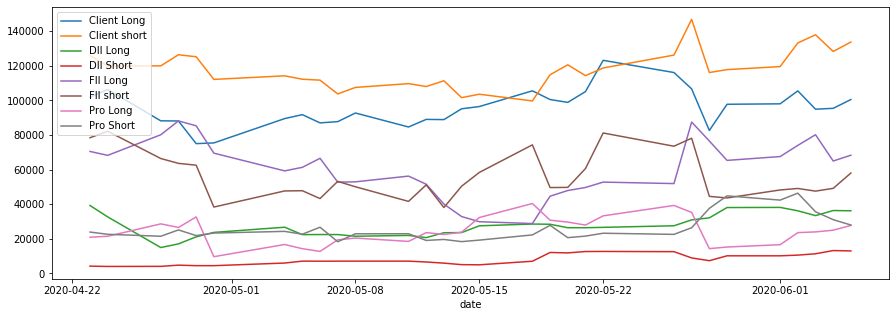

In [19]:
frames = [clientDataFrame['Future Index Long'], clientDataFrame['Future Index Short'],
                               diiDataFrame['Future Index Long'], diiDataFrame['Future Index Short'],
                               fiiDataFrame['Future Index Long'], fiiDataFrame['Future Index Short'],
                               proDataFrame['Future Index Long'], proDataFrame['Future Index Short']]
dfkeys = ['Client Long', 'Client short', 'DII Long', 'DII Short', 'FII Long', 'FII short', 'Pro Long', 'Pro Short']

combinedDataFrame = pd.concat(frames, axis=1, keys = dfkeys)

combinedDataFrame.plot(figsize=(15,5))
print (combinedDataFrame.shape)

(30, 2)


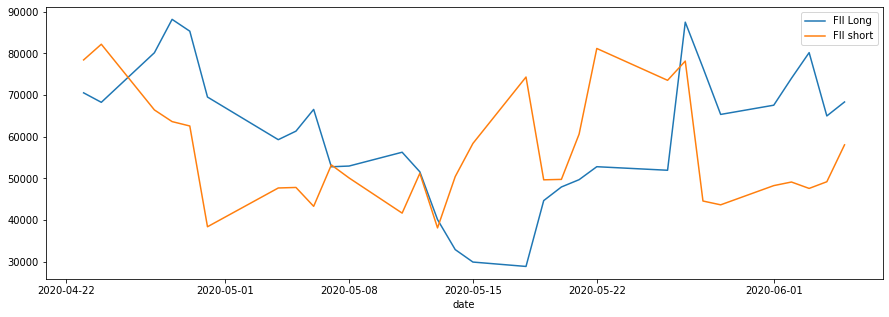

In [20]:
frames = [fiiDataFrame['Future Index Long'], fiiDataFrame['Future Index Short']]
                               
dfkeys = ['FII Long', 'FII short']

combinedDataFrame = pd.concat(frames, axis=1, keys = dfkeys)

combinedDataFrame.plot(figsize=(15,5))
print (combinedDataFrame.shape)